In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import array
import math
from scipy import signal

signal generation

In [2]:
sig1 = array.array('f')
sig2 = array.array('f')
sig3 = array.array('f')
for i in range(0,25000000):
    a = 10
    b = 10
    c = 10
    rand1 = random.randint(0,3)
    rand2 = random.randint(0,3)
    rand3 = random.randint(0,3)
    for j in range(0,a):
        sig1.append(rand1)
    for k in range(0,b):
        sig2.append(rand2)
    for p in range(0,c):
        sig3.append(rand3)

length1 = len(sig1)
length2 = len(sig2)
length3 = len(sig3)

length = min(length1,length2,length3)

 Lowpass filtering

In [3]:
x = np.linspace(0,15,400)
b,a = signal.butter(2,0.16,'lowpass')
y1 = signal.filtfilt(b,a,sig1)
y2 = signal.filtfilt(b,a,sig2)
y3 = signal.filtfilt(b,a,sig3)

eye diagram of the original data

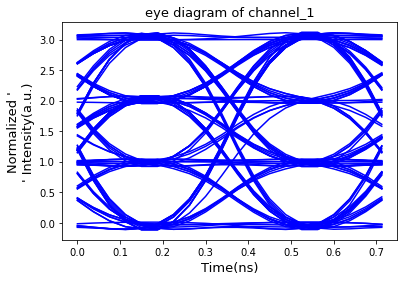

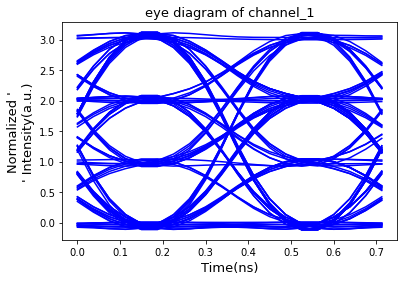

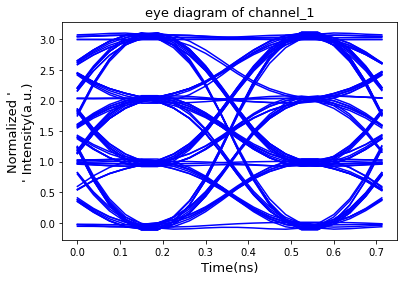

In [707]:
for i in range(100):
    y=[]
    for j in range(20):
        y.append(y1[(i+10)*20+j])
    plt.plot(x[:20],y,'b')
plt.xlabel("Time(ns)",fontsize=13)
plt.ylabel("Normalized '\n' Intensity(a.u.)",fontsize=13)
plt.title('eye diagram of channel_1',fontsize=13)
plt.show()
for i in range(100):
    y=[]
    for j in range(20):
        y.append(y2[(i+10)*20+j])
    plt.plot(x[:20],y,'b')
plt.xlabel("Time(ns)",fontsize=13)
plt.ylabel("Normalized '\n' Intensity(a.u.)",fontsize=13)
plt.title('eye diagram of channel_2',fontsize=13)
plt.show()
for i in range(100):
    y=[]
    for j in range(20):
        y.append(y3[(i+10)*20+j])
    plt.plot(x[:20],y,'b')
plt.xlabel("Time(ns)",fontsize=13)
plt.ylabel("Normalized '\n' Intensity(a.u.)",fontsize=13)
plt.title('eye diagram of channel_3',fontsize=13)
plt.show()

transmission matrix

In [7]:
a11 = 0.8 + 0.05
a12 = 0.08
a13 = 0.10
a21 = 0.09
a22 = 0.8 + 0.05
a23 = 0.06
a31 = 0.06
a32 = 0.07
a33 = 0.8 + 0.04

In [8]:
Y4=[]
Y5=[]
Y6=[]
xx = np.linspace(1,length,length)
sample_distance = 20
for i in range(0,length//sample_distance):
    Y4.append((a11+0.05*math.sin(xx[i]*math.pi/10000))*y1[sample_distance*i]+(a12-0.025*math.cos(xx[i]*math.pi/10000))*y2[sample_distance*i]\
              +(a13-0.025*(math.sin(xx[i]*math.pi/10000)+math.cos(xx[i]*math.pi/10000)))*y3[sample_distance*i])
    Y5.append((a21-0.025*math.sin(xx[i]*math.pi/10000))*y1[sample_distance*i]+(a22+0.05*math.cos(xx[i]*math.pi/10000))*y2[sample_distance*i]\
              +(a23-0.025*(math.sin(xx[i]*math.pi/10000)+math.cos(xx[i]*math.pi/10000)))*y3[sample_distance*i])
    Y6.append((a31-0.025*math.sin(xx[i]*math.pi/10000))*y1[sample_distance*i]+(a32-0.025*math.cos(xx[i]*math.pi/10000))*y2[sample_distance*i]\
              +(a33+0.05*(math.sin(xx[i]*math.pi/10000)+math.cos(xx[i]*math.pi/10000)))*y3[sample_distance*i])

set bytes in  a group

In [714]:
count = 0
groupnumber = 5000 #the number of bytes in a group

function of variance and kurtosis

In [715]:
def f_vork(W_1,W_2,W_3,m1,channel,y4=Y4,y5=Y5,y6=Y6,):
    global count
    global groupnumber
    count = count + 1
    if m1 == 1:
        if channel == 0:
            W_1 = round(0.8 + 0.2 * W_1,3)
            W_2 = round(0.2 * W_2,3)
            W_3 = round(0.2 * W_3,3)
        if channel == -1:
            W_1 = round(-0.2 * W_1,3)
            W_2 = round(0.8 + 0.2 * W_2,3)
            W_3 = round(0.2 * W_3,3)
        to = [W_1*i+W_2*j+W_3*k for i,j,k in zip(y4[groupnumber*(count-1):groupnumber*count], y5[groupnumber*(count-1):groupnumber*count], y6[groupnumber*(count-1):groupnumber*count])]
        return np.var(to)
    elif m1 == 2:
        W_1_array = np.array(W_1)
        W_2_array = np.array(W_2)
        W_3_array = np.array(W_3)
        v = copy()
        WV11 = v[0]*W_1_array + v[1]*W_2_array + v[2]*W_3_array
        WV22 = v[3]*W_1_array + v[4]*W_2_array + v[5]*W_3_array
        WV33 = v[6]*W_1_array + v[7]*W_2_array + v[8]*W_3_array
        if channel == 1:
            WV1 = round(0.8 + 0.2*WV11/(abs(WV11)+abs(WV22)+abs(WV33)),3)
            WV2 = round(-abs(0.2*WV22/(abs(WV11)+abs(WV22)+abs(WV33))),3)
            WV3 = round(-abs(0.2*WV33/(abs(WV11)+abs(WV22)+abs(WV33))),3)
        if channel == 2:
            WV1 = round(-abs(0.2*WV11/(abs(WV11)+abs(WV22)+abs(WV33))),3)
            WV2 = round(0.8 + 0.2*WV22/(abs(WV11)+abs(WV22)+abs(WV33)),3)
            WV3 = round(-abs(0.2*WV33/(abs(WV11)+abs(WV22)+abs(WV33))),3)
        if channel == 3:
            WV1 = round(-abs(0.2*WV11/(abs(WV11)+abs(WV22)+abs(WV33))),3)
            WV2 = round(-abs(0.2*WV22/(abs(WV11)+abs(WV22)+abs(WV33))),3)
            WV3 = round(0.8 + 0.2*WV33/(abs(WV11)+abs(WV22)+abs(WV33)),3)
        to = list([WV1*i+WV2*j+WV3*k for i,j,k in zip(y4[groupnumber*(count-1):groupnumber*count], y5[groupnumber*(count-1):groupnumber*count], y6[groupnumber*(count-1):groupnumber*count])])
        Me = np.mean(to)
        A = 0
        for i in range(0,groupnumber):
            A = A + (to[i]-Me)**4
        return abs(A/groupnumber/(np.var(to)**2)-3)

set the initial weight of PCA

In [716]:
W1 = []
W2 = []
W3 = []
fw = []
N = 3
for i in range(0,N):
    middle1 = (random.randint(0,200)-100) / 100
    middle2 = (random.randint(0,200)-100) / 100
    middle3 = (random.randint(0,200)-100) / 100
    W1.append(round(middle1 / (abs(middle1)+abs(middle2)+abs(middle3)),3))
    W2.append(round(middle2 / (abs(middle1)+abs(middle2)+abs(middle3)),3))
    W3.append(round(middle3 / (abs(middle1)+abs(middle2)+abs(middle3)),3))
    fw.append(f_vork(W1[i],W2[i],W3[i],1,0))

function of searching the best weight

In [717]:
def search_weight(w1,w2,w3,f,n,m2,channel):
    frecord1 = []
    frecord2 = []
    t = 0.01
    B = 1
    r = 2
    p = 0.5
    s = 0.5
    fmax = max(f)
    w1max = w1[f.index(fmax)]
    w2max = w2[f.index(fmax)]
    w3max = w3[f.index(fmax)]
    fmin = min(f)
    w1min = w1[f.index(fmin)]
    w2min = w2[f.index(fmin)]
    w3min = w3[f.index(fmin)]
    print(fmax)
    print(fmin)
    number = 0
    Z = []
    if abs(fmax-fmin) <= t:
        return w1max,w2max,w3max
    while (abs(fmax-fmin) > t or number < 5) and number < 150:
        number += 1
        Z.append(number)
        if m2 == 1:
            w1cen = (sum(w1) - w1min)/(n-1)
            w2cen = (sum(w2) - w2min)/(n-1)
            w3cen = (sum(w3) - w3min)/(n-1)
        elif m2 == 2:
            w1cen = sum(w1)/n
            w2cen = sum(w2)/n
            w3cen = sum(w3)/n
        w1ref = (w1cen + B*(w1cen - w1min)) / (abs(w1cen + B*(w1cen - w1min)) + abs(w2cen + B*(w2cen - w2min)) + abs(w3cen + B*(w3cen - w3min)))
        w2ref = (w2cen + B*(w2cen - w2min)) / (abs(w1cen + B*(w1cen - w1min)) + abs(w2cen + B*(w2cen - w2min))+ abs(w3cen + B*(w3cen - w3min)))
        w3ref = (w3cen + B*(w3cen - w3min)) / (abs(w1cen + B*(w1cen - w1min)) + abs(w2cen + B*(w2cen - w2min))+ abs(w3cen + B*(w3cen - w3min)))
        fref = f_vork(w1ref,w2ref,w3ref,m2,channel)
        if fmin <fref < fmax:
            w1min = w1ref
            w2min = w2ref
            w3min = w3ref
            fmin = fref
        elif fref >= fmax:
            w1exp = (w1cen+r*(w1ref-w1cen)) / (abs(w1cen+r*(w1ref-w1cen)) + abs(w2cen+r*(w2ref-w2cen)) + abs(w3cen+r*(w3ref-w3cen)))
            w2exp = (w2cen+r*(w2ref-w2cen)) / (abs(w1cen+r*(w1ref-w1cen)) + abs(w2cen+r*(w2ref-w2cen)) + abs(w3cen+r*(w3ref-w3cen)))
            w3exp = (w3cen+r*(w3ref-w3cen)) / (abs(w1cen+r*(w1ref-w1cen)) + abs(w2cen+r*(w2ref-w2cen)) + abs(w3cen+r*(w3ref-w3cen)))
            fexp = f_vork(w1exp,w2exp,w3exp,m2,channel)
            if fref < fexp:
                w1max = w1exp
                w2max = w2exp
                w3max = w3exp
                fmax = fexp
            elif fmin < fexp <= fref:
                w1max = w1ref
                w2max = w2ref
                w3max = w3ref
                fmax = fref
                w1min = w1exp
                w2min = w2exp
                w3min = w3exp
                fmin = fexp
        elif fref <= fmin:
            w1con = (w1cen+p*(w1min-w1cen)) / (abs(w1cen+p*(w1min-w1cen)) + abs(w2cen+p*(w2min-w2cen)) + abs(w3cen+p*(w3min-w3cen)))
            w2con = (w2cen+p*(w2min-w2cen)) / (abs(w1cen+p*(w1min-w1cen)) + abs(w2cen+p*(w2min-w2cen)) + abs(w3cen+p*(w3min-w3cen)))
            w3con = (w3cen+p*(w3min-w3cen)) / (abs(w1cen+p*(w1min-w1cen)) + abs(w2cen+p*(w2min-w2cen)) + abs(w3cen+p*(w3min-w3cen)))
            fcon = f_vork(w1con,w2con,w3con,m2,channel)
            if fmax > fcon > fmin:
                w1min = w1con
                w2min = w2con
                w3min = w3con
                fmin = fcon
            elif fcon > fmax:
                w1max = w1con
                w2max = w2con
                w3max = w3con
                fmax = fcon
            else:
                fww = []
                for i in range(0,n):
                    w1[i] = (w1max+s*(w1[i]-w1max)) / (abs(w1max+s*(w1[i]-w1max)) + abs(w2max+s*(w2[i]-w2max)) + abs(w3max+s*(w3[i]-w3max)))
                    w2[i] = (w2max+s*(w2[i]-w2max)) / (abs(w1max+s*(w1[i]-w1max)) + abs(w2max+s*(w2[i]-w2max)) + abs(w3max+s*(w3[i]-w3max)))
                    w3[i] = (w3max+s*(w3[i]-w3max)) / (abs(w1max+s*(w1[i]-w1max)) + abs(w2max+s*(w2[i]-w2max)) + abs(w3max+s*(w3[i]-w3max)))
                    fww.append(f_vork(w1[i],w2[i],w3[i],m2,channel))
                if fmax < max(fww):
                    fmax = max(fww)
                    w1max = w1[fww.index(max(fww))]
                    w2max = w2[fww.index(max(fww))]
                    w3max = w3[fww.index(max(fww))]
                if fmin < min(fww):
                    fmin = min(fww)
                    w1min = w1[fww.index(min(fww))]
                    w2min = w2[fww.index(min(fww))]
                    w3min = w3[fww.index(min(fww))]
        frecord1.append(fmax)
        frecord2.append(fmin)
    plt.plot(Z,frecord1,'r')
    plt.plot(Z,frecord2,'k')
    plt.xlabel('Iterations',fontsize=18)
    if m2 == 1:
        plt.ylabel('variance',fontsize=18)
        plt.legend(['Var_max','Var_min'],fontsize=13,loc= 4)
    else:
        plt.ylabel('kurtosis',fontsize=18)
        plt.legend(['Kurt_max','Kurt_min'],fontsize=13,loc=4)
    if channel > 0:
        plt.title('convergence of channel_'+str(channel),fontsize=18)
    else:
        plt.title('convergence of channel',fontsize=18)
    
    plt.show()
    
    print(fmax)
    print(fmin)
    print(number)
    if channel == 0:
        return 0.8 + 0.2*w1max,0.2*w2max,0.2*w3max
    else:
        return w1max,w2max,w3max

In [718]:
def search_weight2(w1,w2,w3,f,n,m2,E,channel):
    frecord1 = []
    frecord2 = []
    t = 0.01
    B = 1
    r = 2
    p = 0.5
    s = 0.5
    fmax = max(f)
    w1max = w1[f.index(fmax)]
    w2max = w2[f.index(fmax)]
    w3max = w3[f.index(fmax)]
    fmin = min(f)
    w1min = w1[f.index(fmin)]
    w2min = w2[f.index(fmin)]
    w3min = w3[f.index(fmin)]
    print(fmax)
    print(fmin)
    number = 0
    Z = []
    if abs(fmax-fmin) <= t:
        return w1max,w2max,w3max
    while (abs(fmax-fmin) > t or number < 5) and number < 150:
        number += 1
        Z.append(number)
        if m2 == 1:
            w1cen = (sum(w1) - w1min)/(n-1)
            w2cen = (sum(w2) - w2min)/(n-1)
            w3cen = (sum(w3) - w3min)/(n-1)
        elif m2 == 2:
            w1cen = sum(w1)/n
            w2cen = sum(w2)/n
            w3cen = sum(w3)/n
        w1ref = (w1cen + B*(w1cen - w1min)) / (abs(w1cen + B*(w1cen - w1min)) + abs(w2cen + B*(w2cen - w2min)) +\
                                              abs(((w1cen + B*(w1cen - w1min)) * E[0] + (w2cen + B*(w2cen - w2min)) * E[1])) / (-E[2]))
        w2ref = (w2cen + B*(w2cen - w2min)) / (abs(w1cen + B*(w1cen - w1min)) + abs(w2cen + B*(w2cen - w2min)) +\
                                              abs(((w1cen + B*(w1cen - w1min)) * E[0] + (w2cen + B*(w2cen - w2min)) * E[1])) / (-E[2]))
        w3ref = (((w1cen + B*(w1cen - w1min)) * E[0] + (w2cen + B*(w2cen - w2min)) * E[1]) / (-E[2])) / \
                                               (abs(w1cen + B*(w1cen - w1min)) + abs(w2cen + B*(w2cen - w2min)) + \
                                                abs(((w1cen + B*(w1cen - w1min)) * E[0] + (w2cen + B*(w2cen - w2min)) * E[1]) / (-E[2])))
        
        fref = f_vork(w1ref,w2ref,w3ref,m2,channel)
        if fmin <fref < fmax:
            w1min = w1ref
            w2min = w2ref
            w3min = w3ref
            fmin = fref
        elif fref >= fmax:
            w1exp = (w1cen+r*(w1ref-w1cen)) / (abs(w1cen+r*(w1ref-w1cen)) + abs(w2cen+r*(w2ref-w2cen)) + \
                                              abs(((w1cen+r*(w1ref-w1cen)) * E[0] + (w2cen+r*(w2ref-w2cen)) * E[1])/(-E[2])))
            w2exp = (w2cen+r*(w2ref-w2cen)) / (abs(w1cen+r*(w1ref-w1cen)) + abs(w2cen+r*(w2ref-w2cen)) + \
                                              abs(((w1cen+r*(w1ref-w1cen)) * E[0] + (w2cen+r*(w2ref-w2cen)) * E[1])/(-E[2])))
            w3exp = (((w1cen+r*(w1ref-w1cen)) * E[0] + (w2cen+r*(w2ref-w2cen)) * E[1])/(-E[2])) /\
                                                (abs(w1cen+r*(w1ref-w1cen)) + abs(w2cen+r*(w2ref-w2cen)) + \
                                              abs(((w1cen+r*(w1ref-w1cen)) * E[0] + (w2cen+r*(w2ref-w2cen)) * E[1])/(-E[2])))
            fexp = f_vork(w1exp,w2exp,w3exp,m2,channel)
            if fref < fexp:
                w1max = w1exp
                w2max = w2exp
                w3max = w3exp
                fmax = fexp
            elif fmin < fexp <=fref:
                w1max = w1ref
                w2max = w2ref
                w3max = w3ref
                fmax = fref
                w1min = w1exp
                w2min = w2exp
                w3min = w3exp
                fmin = fexp
        elif fref <= fmin:
            w1con = (w1cen+p*(w1min-w1cen)) / (abs(w1cen+p*(w1min-w1cen)) + abs(w2cen+p*(w2min-w2cen)) + \
                                              abs(((w1cen+p*(w1min-w1cen)) * E[0] + (w2cen+p*(w2min-w2cen)) * E[1]) / (-E[2])))
            w2con = (w2cen+p*(w2min-w2cen)) / (abs(w1cen+p*(w1min-w1cen)) + abs(w2cen+p*(w2min-w2cen)) + \
                                              abs(((w1cen+p*(w1min-w1cen)) * E[0] + (w2cen+p*(w2min-w2cen)) * E[1]) / (-E[2])))
            w3con = (((w1cen+p*(w1min-w1cen)) * E[0] + (w2cen+p*(w2min-w2cen)) * E[1]) / (-E[2])) / \
                                               (abs(w1cen+p*(w1min-w1cen)) + abs(w2cen+p*(w2min-w2cen)) + \
                                              abs(((w1cen+p*(w1min-w1cen)) * E[0] + (w2cen+p*(w2min-w2cen)) * E[1]) / (-E[2])))
            fcon = f_vork(w1con,w2con,w3con,m2,channel)
            if fmin < fcon < fmax:
                w1min = w1con
                w2min = w2con
                w3min = w3con
                fmin = fcon
            elif fcon > fmax:
                w1max = w1con
                w2max = w2con
                w3max = w3con
                fmax = fcon
            else:
                fww = []
                for i in range(0,n):
                    w1[i] = (w1max+s*(w1[i]-w1max)) / (abs(w1max+s*(w1[i]-w1max)) + abs(w2max+s*(w2[i]-w2max)) + \
                                                      abs(((w1max+s*(w1[i]-w1max)) * E[0] + (w2max+s*(w2[i]-w2max)) * E[1]) / (-E[2])))
                    w2[i] = (w2max+s*(w2[i]-w2max)) / (abs(w1max+s*(w1[i]-w1max)) + abs(w2max+s*(w2[i]-w2max)) + \
                                                      abs(((w1max+s*(w1[i]-w1max)) * E[0] + (w2max+s*(w2[i]-w2max)) * E[1]) / (-E[2])))
                    w3[i] = (((w1max+s*(w1[i]-w1max)) * E[0] + (w2max+s*(w2[i]-w2max)) * E[1]) / (-E[2])) / \
                                               (abs(w1max+s*(w1[i]-w1max)) + abs(w2max+s*(w2[i]-w2max)) + \
                                                abs(((w1max+s*(w1[i]-w1max)) * E[0] + (w2max+s*(w2[i]-w2max)) * E[1]) / (-E[2])))
                    fww.append(f_vork(w1[i],w2[i],w3[i],m2,channel))
                if fmax < max(fww):
                    fmax = max(fww)
                    w1max = w1[fww.index(max(fww))]
                    w2max = w2[fww.index(max(fww))]
                    w3max = w3[fww.index(max(fww))]
                if fmin < min(fww):
                    fmin = min(fww)
                    w1min = w1[fww.index(min(fww))]
                    w2min = w2[fww.index(min(fww))]
                    w3min = w3[fww.index(min(fww))]
        frecord1.append(fmax)
        frecord2.append(fmin)
    plt.plot(Z,frecord1,'r')
    plt.plot(Z,frecord2,'k')
    plt.xlabel('Iterations',fontsize=18)
    if m2 == 1:
        plt.ylabel('variance',fontsize=18)
        plt.legend(['Var_max','Var_min'],fontsize=13,loc= 4)
    else:
        plt.ylabel('kurtosis',fontsize=18)
        plt.legend(['Kurt_max','Kurt_min'],fontsize=13,loc=4)
    if channel > 0:
        plt.title('convergence of channel_'+str(channel),fontsize=18)
    else:
        plt.title('convergence of channel',fontsize=18)
    
    plt.show()
    
    print(fmax)
    print(fmin)
    print(number)
    return 0.2*w1max,0.8+0.2*w2max,0.2*w3max

get the whiting matrix through PCA

0.43949527339629546
0.3664702036063864


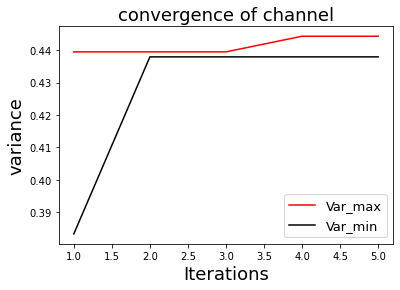

0.44431385911211585
0.43795382283103734
5
0.36849489657728546
0.3272005167037957


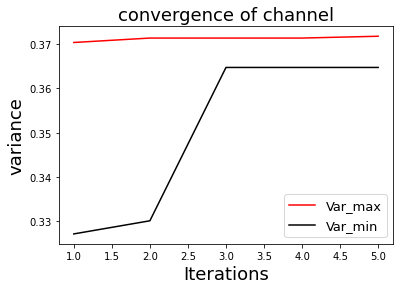

0.37175886237196837
0.36472464756835016
5


In [719]:
e1 = search_weight(W1,W2,W3,fw,N,1,0)
count1 = count
W21 = []
W22 = []
W23 = []
fw_twice = []
for i in range(0,N):
    middle4 = (random.randint(0,200)-100) / 100
    middle5 = (random.randint(0,200)-100) / 100
    middle6 = -(middle4 * e1[0] + middle5 * e1[1]) / e1[2]
    W21.append(round(middle4 / (abs(middle4)+abs(middle5)+abs(middle6)),3))
    W22.append(round(middle5 / (abs(middle4)+abs(middle5)+abs(middle6)),3))
    W23.append(round(middle6 / (abs(middle4)+abs(middle5)+abs(middle6)),3))
    fw_twice.append(f_vork(W21[i],W22[i],W23[i],1,-1))

count = 0    
e2 = search_weight2(W21,W22,W23,fw_twice,N,1,e1,-1)
count2 = count
e3 = []
e3.append(1/(1+abs((e2[0]*e1[2] - e1[0]*e2[2]) / (e1[1]*e2[2] - e2[1]*e1[2])) + \
             abs((e2[0]*e1[1] - e1[0]*e2[1]) / (e1[2]*e2[1] - e1[1]*e2[2]))))
e3.append(((e2[0]*e1[2] - e1[0]*e2[2]) / (e1[1]*e2[2] - e2[1]*e1[2])) / \
         (1+abs((e2[0]*e1[2] - e1[0]*e2[2]) / (e1[1]*e2[2] - e2[1]*e1[2])) + \
             abs((e2[0]*e1[1] - e1[0]*e2[1]) / (e1[2]*e2[1] - e1[1]*e2[2]))))
e3.append(((e2[0]*e1[1] - e1[0]*e2[1]) / (e1[2]*e2[1] - e1[1]*e2[2])) / \
          (1+abs((e2[0]*e1[2] - e1[0]*e2[2]) / (e1[1]*e2[2] - e2[1]*e1[2])) + \
             abs((e2[0]*e1[1] - e1[0]*e2[1]) / (e1[2]*e2[1] - e1[1]*e2[2]))))
ff1 = []
ff2 = []
ff3 = []
for i in range(0,groupnumber):
    ff1.append(e1[0]*Y4[groupnumber*(count-1)+i] + e1[1]*Y4[groupnumber*(count-1)+i] + e1[2]*Y6[groupnumber*(count-1)+i])
    ff2.append(e2[0]*Y4[groupnumber*(count-1)+i] + e2[1]*Y5[groupnumber*(count-1)+i] + e2[2]*Y6[groupnumber*(count-1)+i])
    ff3.append(e3[0]*Y4[groupnumber*(count-1)+i] + e3[1]*Y5[groupnumber*(count-1)+i] + e3[2]*Y6[groupnumber*(count-1)+i])
f1 = np.var(ff1)
f2 = np.var(ff2)
f3 = np.var(ff3)
#weight matrix
V11 = e1[0]*e1[0]*(f1**(-0.5)) + e2[0]*e2[0]*(f2**(-0.5)) + e3[0]*e3[0]*(f3**(-0.5))
V12 = e1[0]*e1[1]*(f1**(-0.5)) + e2[0]*e2[1]*(f2**(-0.5)) + e3[0]*e3[1]*(f3**(-0.5))
V13 = e1[0]*e1[2]*(f1**(-0.5)) + e2[0]*e2[2]*(f2**(-0.5)) + e3[0]*e3[2]*(f3**(-0.5))
V21 = e1[0]*e1[1]*(f1**(-0.5)) + e2[0]*e2[1]*(f2**(-0.5)) + e3[0]*e3[1]*(f3**(-0.5))
V22 = e1[1]*e1[1]*(f1**(-0.5)) + e2[1]*e2[1]*(f2**(-0.5)) + e3[1]*e3[1]*(f2**(-0.5))
V23 = e1[1]*e1[2]*(f1**(-0.5)) + e2[1]*e2[2]*(f2**(-0.5)) + e3[1]*e3[2]*(f2**(-0.5))
V31 = e1[0]*e1[2]*(f1**(-0.5)) + e2[0]*e2[2]*(f2**(-0.5)) + e3[0]*e3[2]*(f3**(-0.5))
V32 = e1[2]*e1[1]*(f1**(-0.5)) + e2[2]*e2[1]*(f2**(-0.5)) + e3[2]*e3[1]*(f3**(-0.5))
V33 = e1[2]*e1[2]*(f1**(-0.5)) + e2[2]*e2[2]*(f2**(-0.5)) + e3[2]*e3[2]*(f3**(-0.5))

In [720]:
def copy(v11=V11,v12=V12,v13=V13,v21=V21,v22=V22,v23=V23,v31=V31,v32=V32,v33=V33):
    return v11,v12,v13,v21,v22,v23,v31,v32,v33

Get the weight of first channel

0.7603791949471672
0.7449733543276156


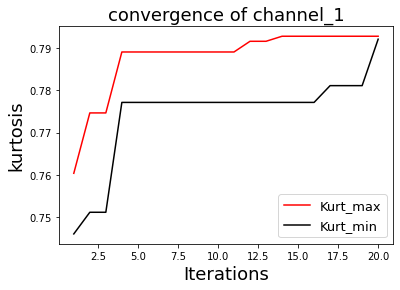

0.7927341604510709
0.7920421818097205
20


In [721]:
WW1 = []
WW2 = []
WW3 = []
fww = []
for i in range(0,N):
    middle10 = (random.randint(0,200)-100) / 100
    middle11 = (random.randint(0,200)-100) / 100
    middle12 = (random.randint(0,200)-100) / 100
    WW1.append(round(middle10 / (abs(middle10) + abs(middle11) + abs(middle12)),3))
    WW2.append(round(middle11 / (abs(middle10) + abs(middle11) + abs(middle12)),3))
    WW3.append(round(middle12 / (abs(middle10) + abs(middle11) + abs(middle12)),3))
    fww.append(f_vork(WW1[i],WW2[i],WW3[i],2,1))

WWW1 = []
WWW2 = []
WWW3 = []
fwww = []
for i in range(0,N):
    middle13 = (random.randint(0,200)-100) / 100
    middle14 = (random.randint(0,200)-100) / 100
    middle15 = -(WW1[i]*middle13 + WW2[i]*middle14) / WW3[i]
    WWW1.append(round(middle13 / (abs(middle13) + abs(middle14) + abs(middle15)),3))
    WWW2.append(round(middle14 / (abs(middle13) + abs(middle14) + abs(middle15)),3))
    WWW3.append(round(middle15 / (abs(middle13) + abs(middle14) + abs(middle15)),3))
    fwww.append(f_vork(WWW1[i],WWW2[i],WWW3[i],2,2))
count = max([count1,count2])
E1 = search_weight(WW1,WW2,WW3,fww,N,2,1)
#E2 = (1 / ( 1 + abs( E1[0] / E1[1])),( E1[0] / E1[1]) / ( 1 + abs( E1[0] / E1[1])))
#E11 = V11*E1[0] + V12*E1[1]
#E12 = V21*E1[0] + V22*E1[1]
#E21 = V11*E2[0] + V12*E2[1]
#E22 = V21*E2[0] + V22*E2[1]

geting the weightings of the second and third  channels

0.7383185817975839
0.7206368197604078


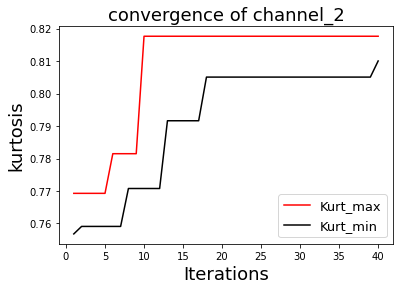

0.8176445670326888
0.8100315591203442
40
0.7677266177017739
0.7086372975674631


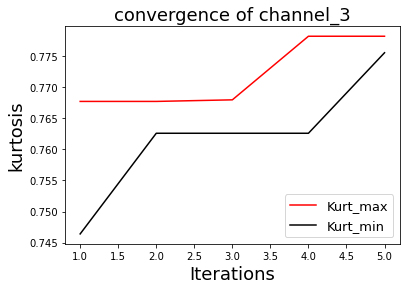

0.7782217534653233
0.7755645618958251
5


In [722]:
count = max([count1,count2])
E2 = search_weight(WWW1,WWW2,WWW3,fwww,N,2,2)

WWWW1 = []
WWWW2 = []
WWWW3 = []
fwwww = []
for i in range(0,N):
    middle16 = (random.randint(0,200)-100) / 100
    middle17 = (random.randint(0,200)-100) / 100
    middle18 = -(WW1[i]*WWW1[i]*middle16 + WW2[i]*WWW2[i]*middle17) / (WW3[i]*WWW3[i])
    WWWW1.append(round(middle16 / (abs(middle16) + abs(middle17) + abs(middle18)),3))
    WWWW2.append(round(middle17 / (abs(middle16) + abs(middle17) + abs(middle18)),3))
    WWWW3.append(round(middle18 / (abs(middle16) + abs(middle17) + abs(middle18)),3))
    fwwww.append(f_vork(WWWW1[i],WWWW2[i],WWWW3[i],2,3))

count = max([count1,count2])
E3 = search_weight(WWWW1,WWWW2,WWWW3,fwwww,N,2,3)

E111 = V11*E1[0] + V12*E1[1] + V13*E1[2]
E122 = V21*E1[0] + V22*E1[1] + V23*E1[2]
E133 = V31*E1[0] + V32*E1[1] + V33*E1[2]
E11 = 0.8 + 0.2*E111/(abs(E111)+abs(E122)+abs(E133))
E12 = -abs(0.2*E122/(abs(E111)+abs(E122)+abs(E133)))
E13 = -abs(0.2*E133/(abs(E111)+abs(E122)+abs(E133)))

E211 = V11*E2[0] + V12*E2[1] + V13*E2[2]
E222 = V21*E2[0] + V22*E2[1] + V23*E2[2]
E233 = V31*E2[0] + V32*E2[1] + V33*E2[2]
E21 = -abs(0.2*E211/(abs(E211)+abs(E222)+abs(E233)))
E22 = 0.8 + 0.2*E222/(abs(E211)+abs(E222)+abs(E233))
E23 = -abs(0.2*E233/(abs(E211)+abs(E222)+abs(E233)))

E311 = V11*E3[0] + V12*E3[1] + V13*E3[2]
E322 = V21*E3[0] + V22*E3[1] + V23*E3[2]
E333 = V31*E3[0] + V32*E3[1] + V33*E3[2]
E31 = -abs(0.2*E311/(abs(E311)+abs(E322)+abs(E333)))
E32 = -abs(0.2*E322/(abs(E311)+abs(E322)+abs(E333)))
E33 = 0.8+0.2*E333/(abs(E311)+abs(E322)+abs(E333))

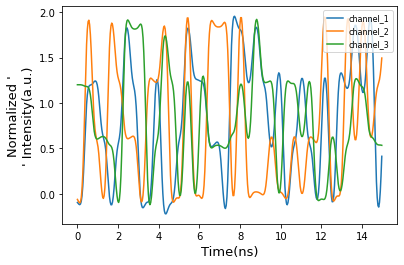

In [723]:
Op1test = []
Op2test = []
Op3test = []
Y4test = []
Y5test = []
Y6test = []
for i in range(0,4000):
    Y4test.append((a11+0.05*math.sin(xx[i]*math.pi/200000))*y1[i]+(a12-0.025*math.cos(xx[i]*math.pi/200000))*y2[i]\
              +(a13-0.025*(math.sin(xx[i]*math.pi/200000)+math.cos(xx[i]*math.pi/200000)))*y3[i])
    Y5test.append((a21-0.025*math.sin(xx[i]*math.pi/200000))*y1[i]+(a22+0.05*math.cos(xx[i]*math.pi/200000))*y2[i]\
              +(a23-0.025*(math.sin(xx[i]*math.pi/200000)+math.cos(xx[i]*math.pi/200000)))*y3[i])
    Y6test.append((a31-0.025*math.sin(xx[i]*math.pi/200000))*y1[i]+(a32-0.025*math.cos(xx[i]*math.pi/200000))*y2[i]\
              +(a33+0.05*(math.sin(xx[i]*math.pi/200000)+math.cos(xx[i]*math.pi/200000)))*y3[i])
for i in range(0,4000):
    Op1test.append(E11*Y4test[i]+E12*Y5test[i]+E13*Y6test[i])
    Op2test.append(E21*Y4test[i]+E22*Y5test[i]+E23*Y6test[i])
    Op3test.append(E31*Y4test[i]+E32*Y5test[i]+E33*Y6test[i])
x = np.linspace(0,150,4000)  
plt.plot(x[:400],Op1test[:400])
#plt.plot(list(np.linspace(1,500,500)),y1[:500])
plt.plot(x[:400],Op2test[:400])
plt.plot(x[:400],Op3test[:400])
plt.xlabel("Time(ns)",fontsize=13)
plt.ylabel("Normalized '\n' Intensity(a.u.)",fontsize=13)
plt.legend(['channel_1','channel_2','channel_3'],fontsize=8,loc=1)
#plt.plot(list(np.linspace(1,500,500)),y2[:500])
plt.show()

result: waveform

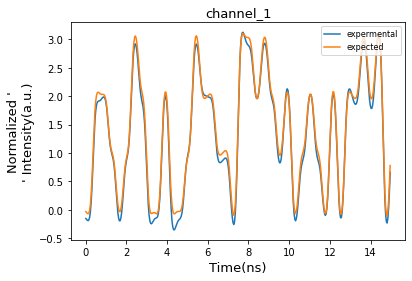

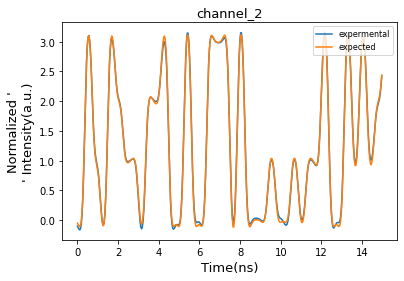

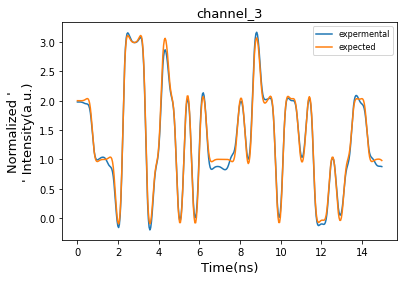

In [733]:
plt.plot(x[:400],Op1test[:400]/max(Op1test)*3.2)
plt.plot(x[:400],y1[:400])
#plt.plot(x,Y4test[:400])
plt.xlabel("Time(ns)",fontsize=13)
plt.ylabel("Normalized '\n' Intensity(a.u.)",fontsize=13)
plt.title('channel_1',fontsize=13)
plt.legend(['expermental','expected'],fontsize=8,loc=1)
plt.show()

plt.plot(x[:400],Op2test[:400]/max(Op2test)*3.2)
plt.plot(x[:400],y2[:400])
#plt.plot(x[:400],Y5test[:400])
plt.xlabel("Time(ns)",fontsize=13)
plt.ylabel("Normalized '\n' Intensity(a.u.)",fontsize=13)
plt.title('channel_2',fontsize=13)
plt.legend(['expermental','expected'],fontsize=8,loc=1)
plt.show()

plt.plot(x[:400],Op3test[:400]/max(Op3test)*3.2)
plt.plot(x[:400],y3[:400])
#plt.plot(x[:400],Y6test[:400])
plt.xlabel("Time(ns)",fontsize=13)
plt.ylabel("Normalized '\n' Intensity(a.u.)",fontsize=13)
plt.title('channel_3',fontsize=13)
plt.legend(['expermental','expected'],fontsize=8,loc=1)
plt.show()

result: eye daigram

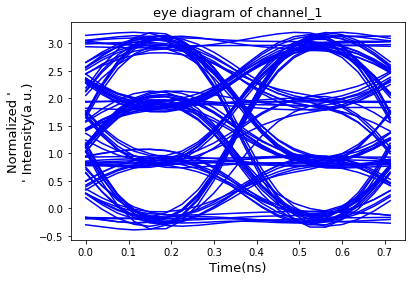

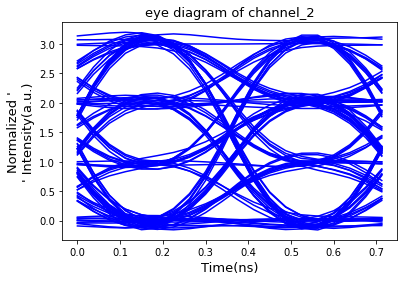

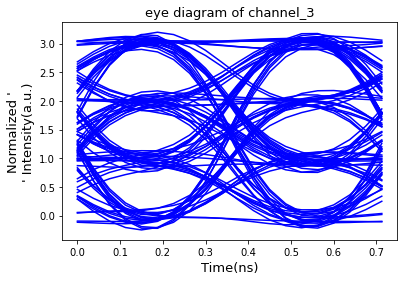

In [734]:
for i in range(100):
    y=[]
    for j in range(20):
        y.append(Op1test[(i+10)*20+j]/max(Op1test)*3.2,)
    plt.plot(x[:20],y,'b')
plt.xlabel("Time(ns)",fontsize=13)
plt.ylabel("Normalized '\n' Intensity(a.u.)",fontsize=13)
plt.title('eye diagram of channel_1',fontsize=13)
plt.show()

for i in range(100):
    y=[]
    for j in range(20):
        y.append(Op2test[(i+10)*20+j]/max(Op2test)*3.2)
    plt.plot(x[:20],y,'b')
plt.xlabel("Time(ns)",fontsize=13)
plt.ylabel("Normalized '\n' Intensity(a.u.)",fontsize=13)
plt.title('eye diagram of channel_2',fontsize=13)
plt.show()

for i in range(100):
    y=[]
    for j in range(20):
        y.append(Op3test[(i+10)*20+j]/max(Op3test)*3.2)
    plt.plot(x[:20],y,'b')
plt.xlabel("Time(ns)",fontsize=13)
plt.ylabel("Normalized '\n' Intensity(a.u.)",fontsize=13)
plt.title('eye diagram of channel_3',fontsize=13)
plt.show()